In [20]:
# Import SparkSession from pyspark.sql
from pyspark.sql import SparkSession
# Create my_spark
spark = SparkSession.builder.getOrCreate()
# load ratings data
df = spark.read.csv("2017_StPaul_MN_Real_Estate.csv", header=True, inferSchema=True)

In [21]:
df.printSchema()

root
 |-- No: integer (nullable = true)
 |-- MLSID: string (nullable = true)
 |-- StreetNumberNumeric: integer (nullable = true)
 |-- streetaddress: string (nullable = true)
 |-- STREETNAME: string (nullable = true)
 |-- PostalCode: integer (nullable = true)
 |-- StateOrProvince: string (nullable = true)
 |-- City: string (nullable = true)
 |-- SalesClosePrice: integer (nullable = true)
 |-- LISTDATE: string (nullable = true)
 |-- LISTPRICE: integer (nullable = true)
 |-- LISTTYPE: string (nullable = true)
 |-- OriginalListPrice: integer (nullable = true)
 |-- PricePerTSFT: double (nullable = true)
 |-- FOUNDATIONSIZE: integer (nullable = true)
 |-- FENCE: string (nullable = true)
 |-- MapLetter: string (nullable = true)
 |-- LotSizeDimensions: string (nullable = true)
 |-- SchoolDistrictNumber: string (nullable = true)
 |-- DAYSONMARKET: integer (nullable = true)
 |-- offmarketdate: string (nullable = true)
 |-- Fireplaces: integer (nullable = true)
 |-- RoomArea4: string (nullable = 

In [18]:
print(df.columns)

['No.', 'MLSID', 'StreetNumberNumeric', 'streetaddress', 'STREETNAME', 'PostalCode', 'StateOrProvince', 'City', 'SalesClosePrice', 'LISTDATE', 'LISTPRICE', 'LISTTYPE', 'OriginalListPrice', 'PricePerTSFT', 'FOUNDATIONSIZE', 'FENCE', 'MapLetter', 'LotSizeDimensions', 'SchoolDistrictNumber', 'DAYSONMARKET', 'offmarketdate', 'Fireplaces', 'RoomArea4', 'roomtype', 'ROOF', 'RoomFloor4', 'PotentialShortSale', 'PoolDescription', 'PDOM', 'GarageDescription', 'SQFTABOVEGROUND', 'Taxes', 'RoomFloor1', 'RoomArea1', 'TAXWITHASSESSMENTS', 'TAXYEAR', 'LivingArea', 'UNITNUMBER', 'YEARBUILT', 'ZONING', 'STYLE', 'ACRES', 'CoolingDescription', 'APPLIANCES', 'backonmarketdate', 'ROOMFAMILYCHAR', 'RoomArea3', 'EXTERIOR', 'RoomFloor3', 'RoomFloor2', 'RoomArea2', 'DiningRoomDescription', 'BASEMENT', 'BathsFull', 'BathsHalf', 'BATHQUARTER', 'BATHSTHREEQUARTER', 'Class', 'BATHSTOTAL', 'BATHDESC', 'RoomArea5', 'RoomFloor5', 'RoomArea6', 'RoomFloor6', 'RoomArea7', 'RoomFloor7', 'RoomArea8', 'RoomFloor8', 'Bedroo

In [22]:
df[['No']].show(5)

+---+
| No|
+---+
|  1|
|  2|
|  3|
|  4|
|  5|
+---+
only showing top 5 rows



In [3]:
# Lot size in square feet
acres_to_sqfeet = 43560
df = df.withColumn('LOT_SIZE_SQFT', df['ACRES'] * acres_to_sqfeet)

# Create new column YARD_SIZE
df = df.withColumn('YARD_SIZE', df['LOT_SIZE_SQFT'] - df['FOUNDATIONSIZE'])

# Corr of ACRES vs SALESCLOSEPRICE
print("Corr of ACRES vs SALESCLOSEPRICE: " + str(df.corr('YARD_SIZE', 'SalesClosePrice')))
# Corr of FOUNDATIONSIZE vs SALESCLOSEPRICE
print("Corr of FOUNDATIONSIZE vs SALESCLOSEPRICE: " + str(df.corr('FOUNDATIONSIZE', 'SalesClosePrice')))
# Corr of YARD_SIZE vs SALESCLOSEPRICE
print("Corr of YARD_SIZE vs SALESCLOSEPRICE: " + str(df.corr('LOT_SIZE_SQFT', 'SalesClosePrice')))

Corr of ACRES vs SALESCLOSEPRICE: 0.20714585430854263
Corr of FOUNDATIONSIZE vs SALESCLOSEPRICE: 0.6152231695664401
Corr of YARD_SIZE vs SALESCLOSEPRICE: 0.22060612588935338


# Ratios

In [4]:
# ASSESSED_TO_LIST
df = df.withColumn('ASSESSED_TO_LIST',df['ASSESSEDVALUATION']/df['LISTPRICE'])
df[['ASSESSEDVALUATION', 'LISTPRICE', 'ASSESSED_TO_LIST']].show(5)
# TAX_TO_LIST
df = df.withColumn('TAX_TO_LIST',df['TAXES']/df['LISTPRICE'])
df[['TAX_TO_LIST', 'TAXES', 'LISTPRICE']].show(5)
# BED_TO_BATHS
df = df.withColumn('BED_TO_BATHS',df['BEDROOMS']/df['BATHSTOTAL'])
df[['BED_TO_BATHS', 'BEDROOMS', 'BATHSTOTAL']].show(5)

+-----------------+---------+----------------+
|ASSESSEDVALUATION|LISTPRICE|ASSESSED_TO_LIST|
+-----------------+---------+----------------+
|              0.0|   139900|             0.0|
|              0.0|   210000|             0.0|
|              0.0|   225000|             0.0|
|              0.0|   230000|             0.0|
|              0.0|   239900|             0.0|
+-----------------+---------+----------------+
only showing top 5 rows

+--------------------+-----+---------+
|         TAX_TO_LIST|TAXES|LISTPRICE|
+--------------------+-----+---------+
|0.013280914939242315| 1858|   139900|
| 0.00780952380952381| 1640|   210000|
|0.010622222222222222| 2390|   225000|
|0.009330434782608695| 2146|   230000|
|0.008378491037932471| 2010|   239900|
+--------------------+-----+---------+
only showing top 5 rows

+------------------+--------+----------+
|      BED_TO_BATHS|BEDROOMS|BATHSTOTAL|
+------------------+--------+----------+
|               1.5|       3|         2|
|1.333333333

# Deeper Features

+-------+-------------------+
|summary| BATHS_PER_1000SQFT|
+-------+-------------------+
|  count|               5000|
|   mean| 1.4302617483739894|
| stddev|  14.12890410245937|
|    min|0.39123630672926446|
|    max|             1000.0|
+-------+-------------------+



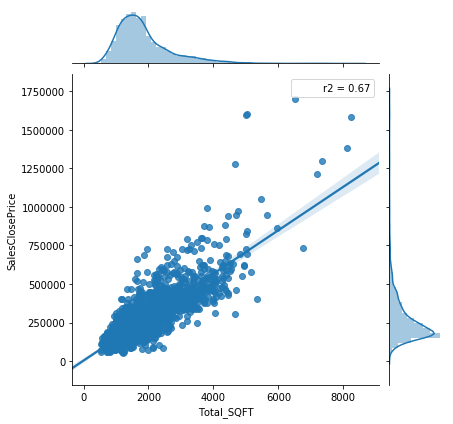

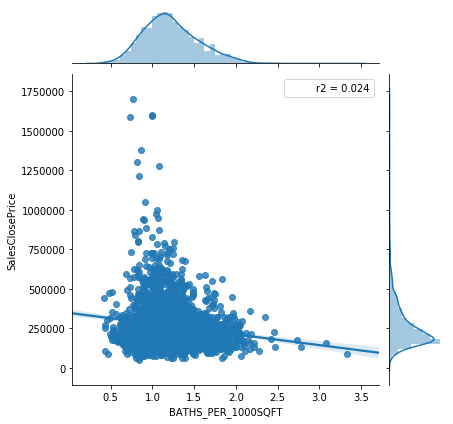

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Create new feature by adding two features together
df = df.withColumn('Total_SQFT', df['SQFTBELOWGROUND'] + df['SQFTABOVEGROUND'])

# Create additional new feature using previously created feature
df = df.withColumn('BATHS_PER_1000SQFT', df['BATHSTOTAL'] / (df['Total_SQFT'] / 1000))
df[['BATHS_PER_1000SQFT']].describe().show()

# Sample and create pandas dataframe
pandas_df = df.sample(False, 0.5, 0).toPandas()

from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

# Linear model plots
sns.jointplot(x='Total_SQFT', y='SalesClosePrice', data=pandas_df, kind="reg", stat_func=r2)
plt.show()
sns.jointplot(x='BATHS_PER_1000SQFT', y='SalesClosePrice', data=pandas_df, kind="reg", stat_func=r2)
plt.show()

# Extracting Text to New Features

In [23]:
# Import needed functions
from pyspark.sql.functions import when

# Create boolean conditions for string matches
has_attached_garage = df['GARAGEDESCRIPTION'].like('%Attached Garage%')
has_detached_garage = df['GARAGEDESCRIPTION'].like('%Detached Garage%')

# Conditional value assignment 
df = df.withColumn('has_attached_garage', (when(has_attached_garage, 1)
                                          .when(has_detached_garage, 0)
                                          .otherwise(None)))

# Inspect results
df[['GARAGEDESCRIPTION', 'has_attached_garage']].show(truncate=100)

+------------------------------------------------------------------+-------------------+
|                                                 GARAGEDESCRIPTION|has_attached_garage|
+------------------------------------------------------------------+-------------------+
|                                                   Attached Garage|                  1|
|           Attached Garage, Driveway - Asphalt, Garage Door Opener|                  1|
|                                                   Attached Garage|                  1|
|    Attached Garage, Detached Garage, Tuckunder, Driveway - Gravel|                  1|
|           Attached Garage, Driveway - Asphalt, Garage Door Opener|                  1|
|                               Attached Garage, Driveway - Asphalt|                  1|
|           Attached Garage, Driveway - Asphalt, Garage Door Opener|                  1|
|                                                   Attached Garage|                  1|
|                    

# Splitting & Exploding

In [24]:
# Import needed functions
from  pyspark.sql.functions import  split, explode

# Convert string to list-like array
df = df.withColumn('garage_list', split(df['GARAGEDESCRIPTION'], ', '))

# Explode the values into new records
ex_df = df.withColumn('ex_garage_list', explode(df['garage_list']))
# Inspect the values
ex_df[['ex_garage_list']].distinct().show(100, truncate=50)

+----------------------------+
|              ex_garage_list|
+----------------------------+
|             Attached Garage|
|      On-Street Parking Only|
|                        None|
| More Parking Onsite for Fee|
|          Garage Door Opener|
|   No Int Access to Dwelling|
|           Driveway - Gravel|
|       Valet Parking for Fee|
|              Uncovered/Open|
|               Heated Garage|
|          Underground Garage|
|                       Other|
|                  Unassigned|
|More Parking Offsite for Fee|
|    Driveway - Other Surface|
|       Contract Pkg Required|
|                     Carport|
|                     Secured|
|             Detached Garage|
|          Driveway - Asphalt|
|                  Units Vary|
|                    Assigned|
|                   Tuckunder|
|                     Covered|
|            Insulated Garage|
|         Driveway - Concrete|
|                      Tandem|
|           Driveway - Shared|
+----------------------------+



# Pivot & Join

In [25]:
from pyspark.sql.functions import coalesce, first, lit
# Create a dummy column of constant value
ex_df = ex_df.withColumn('constant_val', lit(1))
# Pivot 
piv_df = ex_df.groupBy('No').pivot('ex_garage_list').agg(coalesce(first('constant_val')))

In [26]:
# Join the dataframes together and fill null
joined_df = df.join(piv_df, on='No', how='left')

# Columns to zero fill
zfill_cols = piv_df.columns

# Zero fill the pivoted values
zfilled_df = joined_df.fillna(0, subset=zfill_cols)

# Time Components

In [27]:
df[['LISTDATE']].show()

+-------------+
|     LISTDATE|
+-------------+
| 7/15/17 0:00|
| 10/9/17 0:00|
| 6/26/17 0:00|
| 8/25/17 0:00|
| 9/12/17 0:00|
| 4/10/17 0:00|
|  6/8/17 0:00|
| 11/5/17 0:00|
|10/12/17 0:00|
|  9/2/17 0:00|
| 5/19/17 0:00|
| 5/11/17 0:00|
| 3/12/17 0:00|
|  3/6/17 0:00|
| 5/18/17 0:00|
|10/15/17 0:00|
| 9/10/17 0:00|
|  9/1/17 0:00|
|  5/6/17 0:00|
| 8/11/17 0:00|
+-------------+
only showing top 20 rows



In [28]:
from pyspark.sql import functions as F
df=df.withColumn('LISTDATE', F.unix_timestamp("LISTDATE", "MM/dd/yyyy H:mm").cast("timestamp"))


In [29]:
# Import needed functions
from pyspark.sql.functions import to_date, dayofweek
format
# Convert to date type
df = df.withColumn('LISTDATE', to_date('LISTDATE'))


In [30]:
df[['LISTDATE']].show()

+----------+
|  LISTDATE|
+----------+
|0017-07-15|
|0017-10-09|
|0017-06-26|
|0017-08-25|
|0017-09-12|
|0017-04-10|
|0017-06-08|
|0017-11-05|
|0017-10-12|
|0017-09-02|
|0017-05-19|
|0017-05-11|
|0017-03-12|
|0017-03-06|
|0017-05-18|
|0017-10-15|
|0017-09-10|
|0017-09-01|
|0017-05-06|
|0017-08-11|
+----------+
only showing top 20 rows



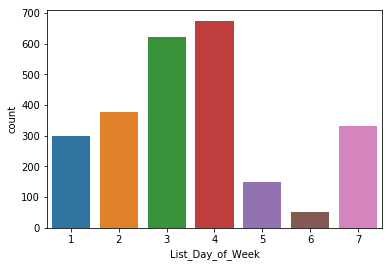

In [31]:
# Get the day of the week
df = df.withColumn('List_Day_of_Week', dayofweek('LISTDATE'))

# Sample and convert to pandas dataframe
sample_df = df.sample(False, 0.5, 42).toPandas()

# Plot count plot of of day of week
ax = sns.countplot(x="List_Day_of_Week", data=sample_df)
plt.show()

In [32]:
from pyspark.sql.functions import lag, datediff, to_date
from pyspark.sql.window import Window

# Create window
w = Window().orderBy(df['LISTDATE'])
# Create lag column
df = df.withColumn('DATE-1', lag('LISTDATE', count=1).over(w))

# Calculate difference between date columns
df = df.withColumn('Days_Between_Report', datediff('LISTDATE', 'DATE-1'))
# Print results
df.select('Days_Between_Report').distinct().show()

+-------------------+
|Days_Between_Report|
+-------------------+
|               null|
|                  1|
|                  0|
|                  2|
|                  3|
|                  9|
|                 12|
+-------------------+



# Binarizing, Bucketing & Encoding

In [33]:
# Import transformer
from pyspark.ml.feature import Binarizer
df=df.withColumn('List_Day_of_Week', df['List_Day_of_Week'].cast('double'))
# Create the transformer
binarizer = Binarizer(threshold=5.0, inputCol='List_Day_of_Week', outputCol='Listed_On_Weekend')

# Apply the transformation to df
df = binarizer.transform(df)

# Verify transformation
df[['List_Day_of_Week', 'Listed_On_Weekend']].show()

+----------------+-----------------+
|List_Day_of_Week|Listed_On_Weekend|
+----------------+-----------------+
|             5.0|              0.0|
|             7.0|              1.0|
|             7.0|              1.0|
|             4.0|              0.0|
|             1.0|              0.0|
|             7.0|              1.0|
|             3.0|              0.0|
|             6.0|              1.0|
|             3.0|              0.0|
|             5.0|              0.0|
|             4.0|              0.0|
|             3.0|              0.0|
|             6.0|              1.0|
|             7.0|              1.0|
|             3.0|              0.0|
|             6.0|              1.0|
|             6.0|              1.0|
|             4.0|              0.0|
|             5.0|              0.0|
|             4.0|              0.0|
+----------------+-----------------+
only showing top 20 rows



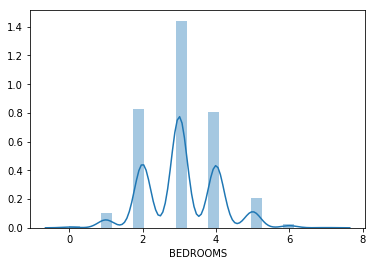

In [34]:
from pyspark.ml.feature import Bucketizer

# Plot distribution of sample_df
sns.distplot(sample_df['Bedrooms'], axlabel='BEDROOMS')
plt.show()

In [35]:
# Create the bucket splits and bucketizer
splits = [0, 1, 2, 3, 4, 5, float('Inf')]
buck = Bucketizer(splits=splits, inputCol='Bedrooms', outputCol='bedrooms')

# Apply the transformation to df
df = buck.transform(df)

# Display results
df[['BEDROOMS', 'bedrooms']].show()

+--------+--------+
|BEDROOMS|bedrooms|
+--------+--------+
|     3.0|     3.0|
|     4.0|     4.0|
|     2.0|     2.0|
|     2.0|     2.0|
|     3.0|     3.0|
|     3.0|     3.0|
|     3.0|     3.0|
|     3.0|     3.0|
|     3.0|     3.0|
|     3.0|     3.0|
|     3.0|     3.0|
|     3.0|     3.0|
|     3.0|     3.0|
|     3.0|     3.0|
|     2.0|     2.0|
|     3.0|     3.0|
|     3.0|     3.0|
|     3.0|     3.0|
|     3.0|     3.0|
|     3.0|     3.0|
+--------+--------+
only showing top 20 rows



In [36]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer

# Map strings to numbers with string indexer
string_indexer = StringIndexer(inputCol='SchoolDistrictNumber', outputCol='School_Index')
indexed_df = string_indexer.fit(df).transform(df)

# Onehot encode indexed values
encoder = OneHotEncoder(inputCol='School_Index', outputCol='School_Vec')
encoded_df = encoder.transform(indexed_df)

# Inspect the transformation steps
encoded_df[['SCHOOLDISTRICTNUMBER', 'School_Index', 'School_Vec']].show(truncate=100)

+-----------------------------+------------+-------------+
|         SCHOOLDISTRICTNUMBER|School_Index|   School_Vec|
+-----------------------------+------------+-------------+
|             834 - Stillwater|         3.0|(7,[3],[1.0])|
|             834 - Stillwater|         3.0|(7,[3],[1.0])|
|622 - North St Paul-Maplewood|         1.0|(7,[1],[1.0])|
|             834 - Stillwater|         3.0|(7,[3],[1.0])|
|622 - North St Paul-Maplewood|         1.0|(7,[1],[1.0])|
|             834 - Stillwater|         3.0|(7,[3],[1.0])|
|             834 - Stillwater|         3.0|(7,[3],[1.0])|
|             834 - Stillwater|         3.0|(7,[3],[1.0])|
|             834 - Stillwater|         3.0|(7,[3],[1.0])|
|             834 - Stillwater|         3.0|(7,[3],[1.0])|
|             834 - Stillwater|         3.0|(7,[3],[1.0])|
|             834 - Stillwater|         3.0|(7,[3],[1.0])|
|             834 - Stillwater|         3.0|(7,[3],[1.0])|
|             834 - Stillwater|         3.0|(7,[3],[1.0]